In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('../data/processed/train_processed.csv')
df_test = pd.read_csv ('../data/processed/test_processed.csv')

In [ ]:

X = df_train.drop(['Survived', 'PassengerId'], axis=1)
y = df_train['Survived'].copy()
pass_ids_df_test = df_test['PassengerId'].copy()
X_test_final = df_test.drop(['PassengerId'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy en el conjunto de validacion: 0.8045

Matriz de confusion
[[93 17]
 [18 51]]


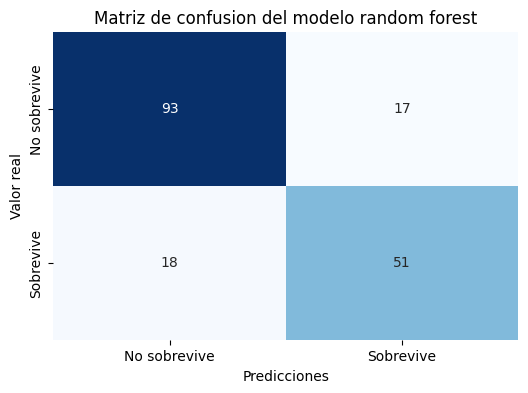


Reporte de clasificacion
                  precision    recall  f1-score   support

No Sobrevive (0)       0.84      0.85      0.84       110
   Sobrevive (1)       0.75      0.74      0.74        69

        accuracy                           0.80       179
       macro avg       0.79      0.79      0.79       179
    weighted avg       0.80      0.80      0.80       179



In [4]:


#Mediciones de calidad del modelo
y_pred = model.predict(X_val)

#Calcular accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy en el conjunto de validacion: {accuracy:.4f}')

#Matriz de confusion
conf_matrix = confusion_matrix(y_val, y_pred)
print('\nMatriz de confusion')
print(conf_matrix)


#Visualizar la matriz de confusion
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No sobrevive', 'Sobrevive'], yticklabels=['No sobrevive', 'Sobrevive'])
plt.xlabel('Predicciones')
plt.ylabel('Valor real')
plt.title('Matriz de confusion del modelo random forest')
plt.show()

#Mostrar reporte de clasificacion
class_report = classification_report(y_val, y_pred, target_names=['No Sobrevive (0)', 'Sobrevive (1)'])
print('\nReporte de clasificacion')
print(class_report)

In [5]:
print(df_train['Survived'].value_counts())
print(df_train['Survived'].value_counts(normalize=True))

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [6]:
#Prediciones de submission
test_predictions = model.predict(X_test_final)
print('predicciones realizadas')
submission_df = pd.DataFrame({'PassengerId': pass_ids_df_test, 'Survived': test_predictions})
submission_df.to_csv('../data/presentation/submission.csv', index=False)
submission_df


predicciones realizadas


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
